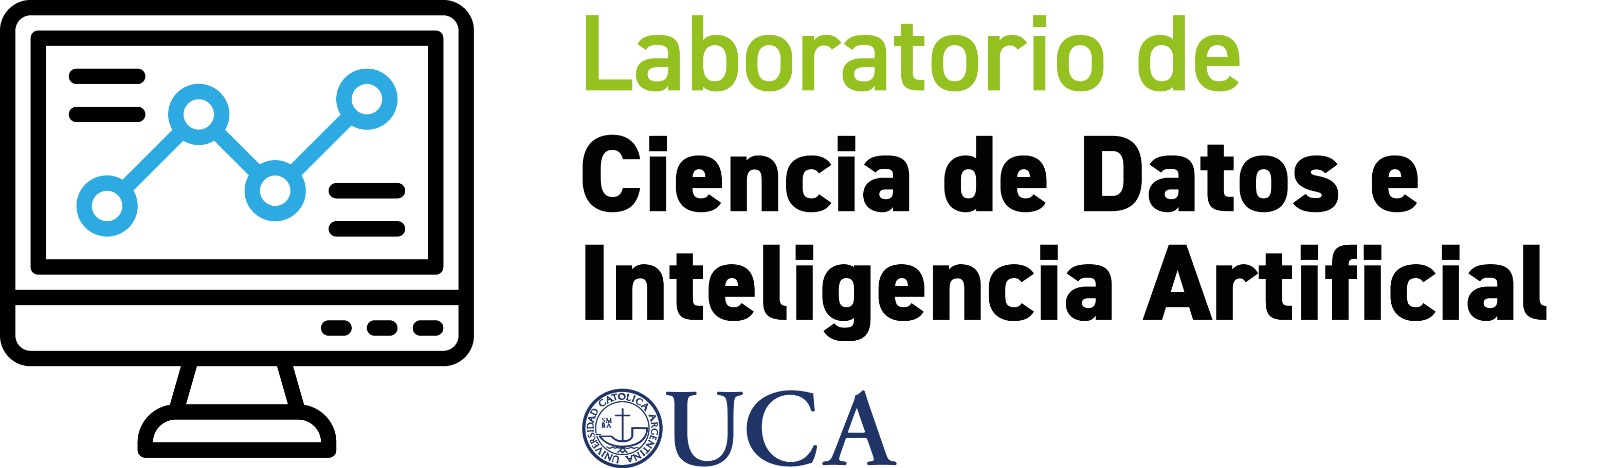


# Taller de Web Scraping

## Nivel 2: Scraping Básico pero no tanto

**Beautiful Soup** <br>
Librería de Python diseñada para extraer datos de archivos HTML y XML

Características principales:
* Parseo automático de HTML/XML.
* Métodos intuitivos para buscar y filtrar elementos (find(), find_all(), select()).
* Integración con requests para descargar páginas web.

### Ejemplo 1

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
url = "http://books.toscrape.com/"

try:
    response = requests.get(url)

    if response.status_code == 200:
        print("Conexión exitosa!")
        print("Content-Type:", response.headers["Content-Type"])

        # Parsear el HTML con BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extraer el título usando BeautifulSoup
        web_title = soup.title.string.strip() if soup.title else "Título no encontrado"
        print(web_title)

    else:
        print(f"Error: Código {response.status_code}")

except Exception as e:
    print("Ocurrió un error:", e)

Conexión exitosa!
Content-Type: text/html
All products | Books to Scrape - Sandbox


In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [ ]:
# El método "find" busca el primer elemento de la pagina con ese tag

primer_h1 = soup.find('h1')

print(primer_h1)

<h1>All products</h1>


In [ ]:
# El método "find" busca el primer elemento de la pagina con ese tag

title = soup.find('title')

print(title)

<title>
    All products | Books to Scrape - Sandbox
</title>


### Ejemplo 2

In [2]:

base_url = "http://books.toscrape.com/catalogue/page-{}.html"
titulos = []
precios = []

for page in range(1, 3):  # Solo 2 páginas por tiempo
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extraer datos
    libros = soup.find_all("article", class_="product_pod")

    print(libros)

    for libro in libros:
        titulos.append(libro.h3.a["title"])
        precios.append(libro.find("p", class_="price_color").text)

# Crear DataFrame
df = pd.DataFrame({"Title": titulos, "Price": precios})

df['Price'] = df['Price'].str.replace('Â£', '').astype(float)
#df.to_csv("libros.csv", index=False)

[<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>, <article class="product_pod">
<div class="image_container">
<a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cache/26/0c/260c6ae16bce31c8f8c

In [ ]:
df.head()

,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23


### Ejemplo 3

In [ ]:
import pandas as pd
from time import sleep

BASE_URL = "http://books.toscrape.com/"
ALL_BOOKS = []

def get_detail(label, default="N/A"):
    element = soup.find("th", text=label)
    return element.find_next_sibling("td").text.strip() if element else default


def get_book_details(book_url):
    try:
        response = requests.get(book_url)
        soup = BeautifulSoup(response.text, "html.parser")


        # Usar el helper para todos los campos
        details = {
            "upc": get_detail("UPC"),
            "product_type": get_detail("Product Type"),
            "reviews": int(get_detail("Number of reviews", "0")),
            "description": get_detail("Product Description")
        }

        # Manejo especial para descripción (estructura diferente)
        desc_div = soup.find("div", id="product_description")
        if desc_div:
            details["description"] = desc_div.find_next("p").text.strip()

        return details

    except Exception as e:
        print(f"Error en {book_url}: {str(e)}")
        return {  # Devuelve valores por defecto si hay error
            "upc": "N/A",
            "product_type": "N/A",
            "reviews": 0,
            "description": "N/A"
        }


# Scrapeo de todas las páginas
page = 1
q_pages=10
while page<=q_pages:
    print(f"Procesando página {page}...")
    url = f"{BASE_URL}catalogue/page-{page}.html"
    response = requests.get(url)

    if response.status_code != 200:
        break

    soup = BeautifulSoup(response.text, "html.parser")
    books = soup.find_all("article", class_="product_pod")

    for book in books:
        try:
            # Datos básicos
            title = book.h3.a["title"]
            price = float(book.find("p", class_="price_color").text[2:])  # Elimina £ y convierte a float
            availability = book.find("p", class_="instock").text.strip()
            rating = book.p["class"][1]  # Ej: "Three" -> 3 estrellas
            book_link = BASE_URL + book.h3.a["href"].replace("../../..", "")

            ALL_BOOKS.append({
                "title": title,
                "price": price,
                "rating": rating,
                "availability": availability,
            })

        except Exception as e:
            print(f"Error procesando libro: {e}")
            continue

    # Verificar si hay siguiente página
    next_button = soup.select_one("li.next > a")
    if not next_button:
        break

    page += 1
    sleep(1)  # Espera 1 segundo entre páginas

Procesando página 1...
Procesando página 2...
Procesando página 3...
Procesando página 4...
Procesando página 5...
Procesando página 6...
Procesando página 7...
Procesando página 8...
Procesando página 9...
Procesando página 10...


In [ ]:
# Crear DataFrame y guardar resultados
df = pd.DataFrame(ALL_BOOKS)

#df.to_csv("books_dataset.csv", index=False)
print(f"\nScraping completado! Libros encontrados: {len(df)}")

df.tail()


Scraping completado! Libros encontrados: 200


,title,price,rating,availability
195,Eureka Trivia 6.0,54.59,Four,In stock
196,Drive: The Surprising Truth About What Motivat...,34.95,Four,In stock
197,Done Rubbed Out (Reightman & Bailey #1),37.72,Five,In stock
198,Doing It Over (Most Likely To #1),35.61,Three,In stock
199,Deliciously Ella Every Day: Quick and Easy Rec...,42.16,Three,In stock
